In [1]:
# AI Project
# 응용시스템학과 최지수_2017053409

# 데이터 명  : Waste Classification data
# 데이터 출처: https://www.kaggle.com/techsash/waste-classification-data

# 설명       : 여덟 종류의 폐기물 이미지를 분류하는 작업
# 클래스     : 배터리, 유기물, 갈색 유리, 판지, 녹색 유리, 금속, 종이, 플라스틱

In [2]:
# 함수 호출
import os
import cv2
import numpy as np
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# 이미지와 클래스를 담을 변수를 정의
X=[]
Y=[]

# 이미지 사이즈를 90으로 축소함
IMG_SIZE = 90

# 경로 저장
GARBAGE_BATTERY_DIR     = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\battery'
GARBAGE_BIOLOGICAL_DIR  = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\biological'
GARBAGE_BROWN_GLASS_DIR = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\brown-glass'
GARBAGE_CARDBOARD_DIR   = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\cardboard'
GARBAGE_GREEN_GLASS_DIR = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\green-glass'
GARBAGE_METAL_DIR       = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\metal'
GARBAGE_PAPER_DIR       = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\paper'
GARBAGE_PLASTIC_DIR     = 'C:\\JupyterProject\\AI\\210618_Project\\garbage_classification\\plastic'

In [4]:
# 폐기물의 종류를 알려주는 함수 정의
def assign_label(img, garbage_type):
    return garbage_type

In [5]:
# 각 경로에 존재하는 이미지를 불러오고, 그때의 레이블을 저장함
def make_train_data(garbage_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,garbage_type)
        path  = os.path.join(DIR,img)
        img   = cv2.imread(path,cv2.IMREAD_COLOR)
        img   = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Y.append(str(label))

In [6]:
make_train_data('battery',GARBAGE_BATTERY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 945/945 [00:01<00:00, 706.73it/s]

945


In [7]:
make_train_data('biological',GARBAGE_BIOLOGICAL_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 985/985 [00:01<00:00, 639.94it/s]

1930


In [8]:
make_train_data('brown_glass',GARBAGE_BROWN_GLASS_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 607/607 [00:00<00:00, 625.96it/s]

2537


In [9]:
make_train_data('cardboard',GARBAGE_CARDBOARD_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 891/891 [00:01<00:00, 476.74it/s]

3428


In [10]:
make_train_data('green_glass',GARBAGE_GREEN_GLASS_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 629/629 [00:00<00:00, 633.76it/s]

4057


In [11]:
make_train_data('metal',GARBAGE_METAL_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:01<00:00, 427.32it/s]

4826


In [12]:
make_train_data('paper',GARBAGE_PAPER_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1050/1050 [00:02<00:00, 361.55it/s]

5876


In [13]:
make_train_data('plastic',GARBAGE_PLASTIC_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 865/865 [00:01<00:00, 459.55it/s]

6741


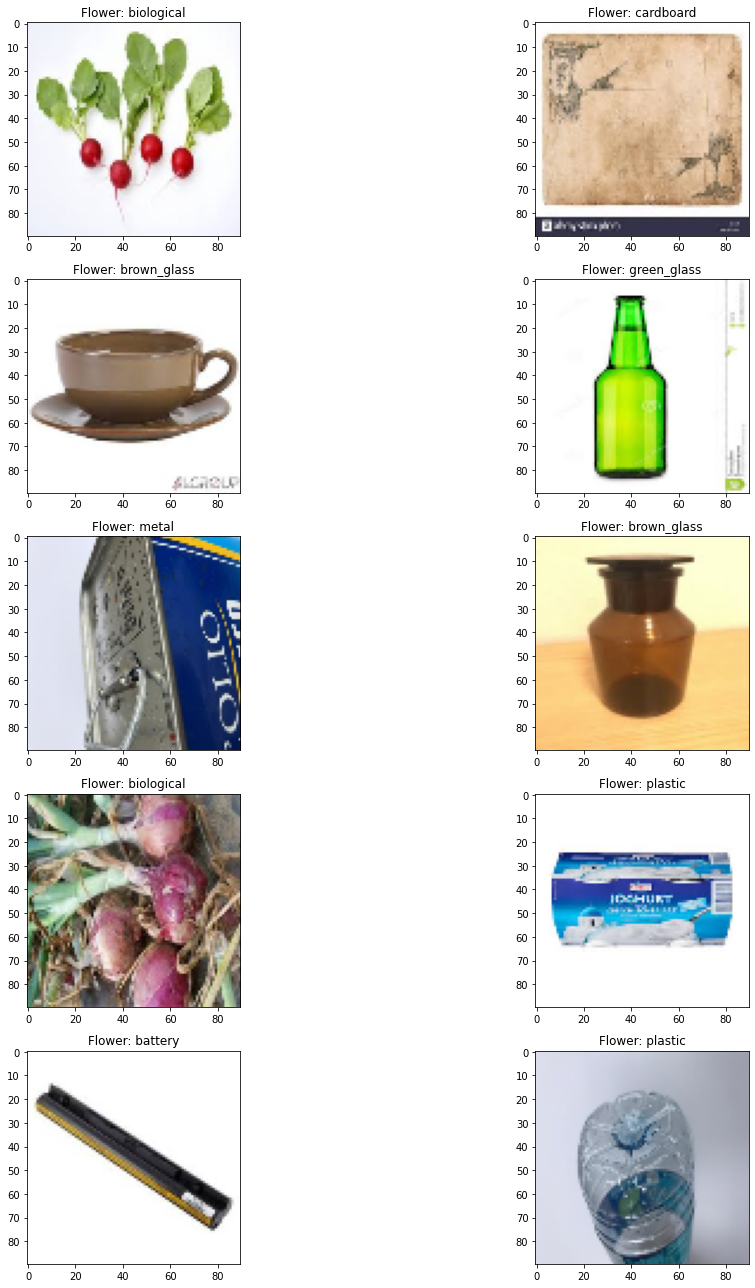

In [14]:
# OpenCV는 BGR로 사용하지만 Matplotlib는 RGB로 이미지를 보여주기 때문에
# cv2.split(image)를 사용해 이미지 파일을 분리한 후, cv2.merge()를 이용해 이미지 b,r을 변경함
# 참고 사이트: https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

# 이미지 확인
fig,ax=plt.subplots(5,2)
fig.set_size_inches(18,18)

for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Y))
        
        # BGR을 RGB로 변경
        b, g, r = cv2.split(X[l])
        X[l] = cv2.merge([r,g,b])
        
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Y[l])
        
plt.tight_layout()

In [15]:
# 이미지 폴더의 하위경로를 불러와서, 레이블로 사용함
class_names = list(os.listdir('C:\\JupyterProject\\AI\\210618_Project\\garbage_classification'))
print(class_names)

['battery', 'biological', 'brown-glass', 'cardboard', 'green-glass', 'metal', 'paper', 'plastic']


In [16]:
# 스케일 맞춤(픽셀의 범위를 0~1 범위로 축소함)
Y = np.array(Y)
X = np.array(X)
X = X / 255

# # BGR을 RGB로 변경
for i in range(len(X)):
    b, g, r = cv2.split(X[i])
    X[i] = cv2.merge([r,g,b])

In [17]:
# 단어로 된 레이블을 숫자로 변경함
le = LabelEncoder()
Y  = le.fit_transform(Y)

print(Y)    # 인코더된 레이블
le.classes_ # 원래 레이블

[0 0 0 ... 7 7 7]


array(['battery', 'biological', 'brown_glass', 'cardboard', 'green_glass',
       'metal', 'paper', 'plastic'], dtype='<U11')

In [18]:
# 데이터 나누기
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# shape 확인
print('1. x_train.shape:', x_train.shape)
print('2. y_train.shape:', y_train.shape)
print('3. x_test.shape :', x_test.shape)
print('4. y_test.shape :', y_test.shape)

1. x_train.shape: (5392, 90, 90, 3)
2. y_train.shape: (5392,)
3. x_test.shape : (1349, 90, 90, 3)
4. y_test.shape : (1349,)


In [20]:
# 타입 확인
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


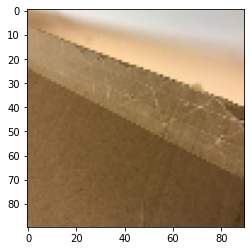

In [21]:
# 데이터 분할 후, 이미지 확인(x_train 1개)
plt.figure()
plt.imshow(x_train[0])
plt.grid(False)
plt.show()

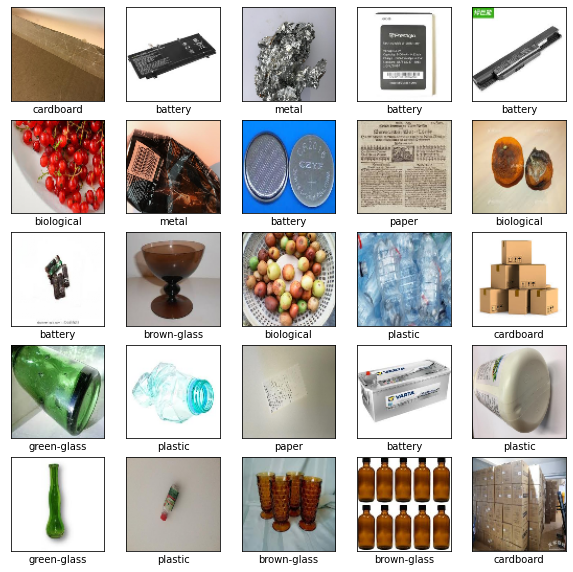

In [22]:
# 데이터 분할 후, 이미지 확인(x_train 25개)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)    
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

In [23]:
# Hypterparameter 지정
img_height  = 90
img_width   = 90
input_shape = (img_height, img_width, 3)
epochs      = 10
num_classes = 8

# 모델 생성
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [24]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# 모델 훈련
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
169/169 [==============================] - 52s 305ms/step - loss: 1.6749 - accuracy: 0.3695 - val_loss: 1.0062 - val_accuracy: 0.6494
Epoch 2/10
169/169 [==============================] - 51s 304ms/step - loss: 1.0387 - accuracy: 0.6448 - val_loss: 0.9265 - val_accuracy: 0.7035
Epoch 3/10
169/169 [==============================] - 54s 321ms/step - loss: 0.8537 - accuracy: 0.7012 - val_loss: 0.8552 - val_accuracy: 0.7146
Epoch 4/10
169/169 [==============================] - 58s 346ms/step - loss: 0.6655 - accuracy: 0.7813 - val_loss: 0.7718 - val_accuracy: 0.7354
Epoch 5/10
169/169 [==============================] - 59s 350ms/step - loss: 0.4849 - accuracy: 0.8407 - val_loss: 0.8761 - val_accuracy: 0.6976
Epoch 6/10
169/169 [==============================] - 60s 355ms/step - loss: 0.4046 - accuracy: 0.8565 - val_loss: 1.0554 - val_accuracy: 0.7168
Epoch 7/10
169/169 [==============================] - 61s 361ms/step - loss: 0.3234 - accuracy: 0.8855 - val_loss: 0.9550 - val_ac

In [26]:
# 예측값 확인
predictions = model.predict(x_test)
print(predictions)

[[9.9999988e-01 4.0573122e-14 7.9000017e-13 ... 4.2463538e-10
  9.7603802e-08 7.4452070e-18]
 [6.2881313e-08 8.5992354e-04 1.0327637e-05 ... 6.1921605e-06
  1.4767347e-06 3.3088002e-04]
 [5.2692495e-10 9.2646246e-07 1.9466409e-06 ... 1.3572601e-07
  1.7498888e-03 3.1386598e-06]
 ...
 [2.4025783e-05 2.7156799e-04 2.5249986e-16 ... 4.5227454e-11
  2.4873181e-08 9.5126618e-09]
 [3.9607169e-08 9.9995470e-01 3.6562189e-05 ... 1.0811868e-10
  8.4237263e-06 3.4475453e-10]
 [3.4371151e-05 4.8144873e-05 5.3443620e-03 ... 2.5937807e-02
  7.4317139e-01 2.2300979e-01]]


In [27]:
# 8개의 레이블 중, 가장 큰 값을 최종 레이블로 저장
y_test_dummy = []

for i in range(int(x_test.shape[0])):
    y_test_dummy.append(np.argmax(predictions[i]))

print(y_test_dummy)

[0, 3, 3, 0, 1, 6, 3, 6, 0, 7, 0, 1, 2, 7, 2, 4, 7, 6, 2, 2, 6, 6, 6, 3, 1, 1, 4, 2, 3, 0, 1, 7, 3, 6, 6, 6, 1, 3, 0, 0, 2, 1, 0, 0, 5, 1, 4, 6, 2, 6, 4, 6, 3, 1, 6, 1, 2, 4, 6, 4, 1, 3, 1, 1, 0, 1, 3, 5, 2, 0, 6, 6, 7, 1, 0, 3, 3, 0, 2, 2, 7, 1, 3, 1, 7, 2, 0, 5, 7, 6, 7, 1, 1, 7, 6, 7, 4, 3, 3, 4, 0, 1, 7, 3, 6, 6, 6, 6, 3, 1, 2, 6, 6, 0, 6, 1, 6, 0, 6, 7, 6, 1, 2, 3, 6, 7, 6, 2, 2, 5, 1, 7, 1, 4, 3, 6, 6, 4, 1, 1, 2, 6, 6, 4, 6, 3, 3, 1, 2, 6, 3, 4, 7, 2, 3, 2, 3, 7, 3, 1, 6, 7, 5, 1, 6, 2, 0, 3, 6, 7, 6, 0, 0, 6, 7, 6, 0, 0, 7, 3, 5, 4, 0, 0, 0, 0, 3, 6, 0, 0, 1, 1, 6, 4, 0, 0, 0, 5, 7, 2, 0, 0, 3, 4, 6, 1, 4, 1, 2, 1, 0, 1, 4, 5, 7, 0, 6, 1, 4, 3, 7, 1, 0, 7, 7, 6, 6, 0, 4, 7, 4, 5, 1, 3, 3, 6, 0, 7, 6, 7, 7, 1, 3, 1, 0, 6, 0, 3, 5, 3, 1, 3, 0, 1, 6, 7, 4, 0, 6, 3, 0, 4, 0, 4, 6, 4, 6, 0, 6, 6, 6, 5, 1, 0, 5, 0, 1, 1, 7, 7, 1, 3, 4, 3, 4, 1, 4, 1, 6, 6, 6, 4, 7, 7, 1, 5, 1, 7, 1, 5, 5, 1, 0, 4, 2, 1, 3, 2, 6, 5, 3, 7, 5, 2, 0, 5, 3, 1, 6, 6, 5, 0, 3, 4, 1, 0, 2, 3, 3, 5, 5, 5, 6, 

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_dummy) # 실제 레이블과 예측 레이블
print(cm)

[[164   5   3   0   3   9   6   6]
 [  7 156   8   9   7   4  13   2]
 [  9   6  83   5   3   7   1   0]
 [  2   8   4 133   0   5   9   4]
 [  4   5   3   0 114   2   1   2]
 [ 27   6   8   4   3  69  15   6]
 [  4   4   3   5   0   9 209   2]
 [ 13   6   2   6   4  16  25  91]]


In [29]:
import pandas as pd

def Accuracy(CM):
    CM_pd = pd.DataFrame(cm)
    CM_pd[8] = CM_pd.sum(axis = 1)
    
    for i in range(CM.shape[0]):

        TP = CM_pd.loc[i,i]
        FP = CM_pd.loc[i,8] - TP      
        FN = CM_pd.loc[:,i].sum() - TP 

        # class num
        print("Class:", i)
        
        # Precision
        precision = round(TP / (TP + FP), 3)
        print("precision:", precision)

        # Recall
        recall = round(TP / (TP + FN), 3)
        print("recall   :", recall)
        
        print('-----------------')
    
Accuracy(cm)

Class: 0
precision: 0.837
recall   : 0.713
-----------------
Class: 1
precision: 0.757
recall   : 0.796
-----------------
Class: 2
precision: 0.728
recall   : 0.728
-----------------
Class: 3
precision: 0.806
recall   : 0.821
-----------------
Class: 4
precision: 0.87
recall   : 0.851
-----------------
Class: 5
precision: 0.5
recall   : 0.57
-----------------
Class: 6
precision: 0.886
recall   : 0.749
-----------------
Class: 7
precision: 0.558
recall   : 0.805
-----------------


In [30]:
# 8개 클래스에 대한 예측을 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(8), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

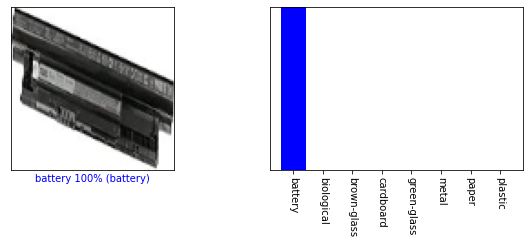

In [31]:
# 0번째 이미지, 예측, 점수 배열을 확인
i = 0
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)

plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
_ = plt.xticks(range(8), class_names, rotation=-90)

plt.show()

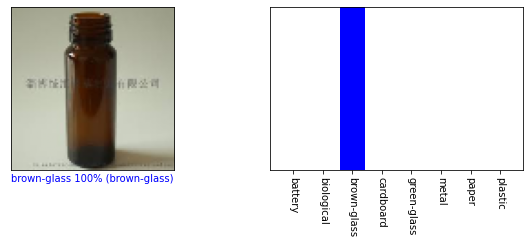

In [32]:
# 12번째 이미지, 예측, 점수 배열을 확인
i = 12
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)

plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
_ = plt.xticks(range(8), class_names, rotation=-90)

plt.show()

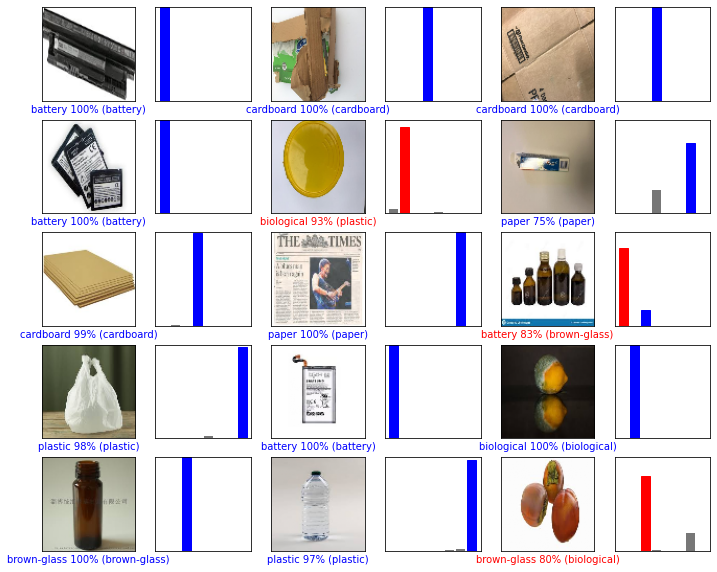

In [33]:
# 15개의 테스트 이미지와 예측 레이블, 실제 레이블을 출력
# 올바른 예측은 파랑색
# 잘못된 예측은 빨강색

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
    
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
#   _ = plt.xticks(range(8), class_names, rotation=-90)

plt.show()

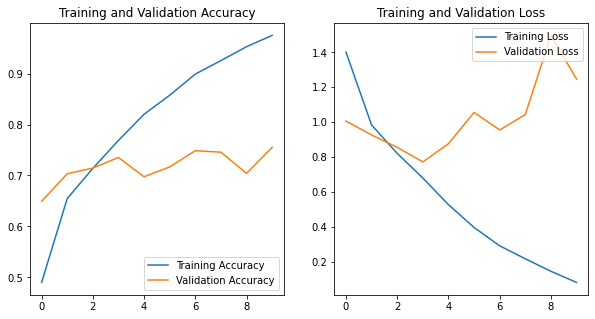

In [34]:
# 훈련 결과 시각화
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [35]:
# 드롭아웃
# 기존 모델에, 드롭아웃 layer 2개 추가

model_drop = Sequential()
model_drop.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model_drop.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_drop.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model_drop.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_drop.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model_drop.add(MaxPooling2D(pool_size=(2, 2)))

model_drop.add(Dropout(0.25)) # layer 추가
model_drop.add(Flatten())
model_drop.add(Dense(1000, activation='relu'))

model_drop.add(Dropout(0.25)) # layer 추가
model_drop.add(Dense(num_classes, activation='softmax'))

model_drop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 90, 90, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)       

In [36]:
# 모델 컴파일
model_drop.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
# 모델 훈련
history_drop = model_drop.fit(x_train, y_train,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Epoch 1/10
169/169 [==============================] - 61s 356ms/step - loss: 1.7293 - accuracy: 0.3509 - val_loss: 1.1633 - val_accuracy: 0.5893
Epoch 2/10
169/169 [==============================] - 61s 358ms/step - loss: 1.0524 - accuracy: 0.6401 - val_loss: 0.9078 - val_accuracy: 0.7116
Epoch 3/10
169/169 [==============================] - 60s 356ms/step - loss: 0.9026 - accuracy: 0.6706 - val_loss: 0.9010 - val_accuracy: 0.6916
Epoch 4/10
169/169 [==============================] - 59s 347ms/step - loss: 0.8507 - accuracy: 0.7067 - val_loss: 0.8057 - val_accuracy: 0.7272
Epoch 5/10
169/169 [==============================] - 55s 326ms/step - loss: 0.6636 - accuracy: 0.7628 - val_loss: 0.7679 - val_accuracy: 0.7420
Epoch 6/10
169/169 [==============================] - 55s 324ms/step - loss: 0.5497 - accuracy: 0.8116 - val_loss: 0.8542 - val_accuracy: 0.7324
Epoch 7/10
169/169 [==============================] - 54s 322ms/step - loss: 0.4532 - accuracy: 0.8427 - val_loss: 0.8793 - val_ac

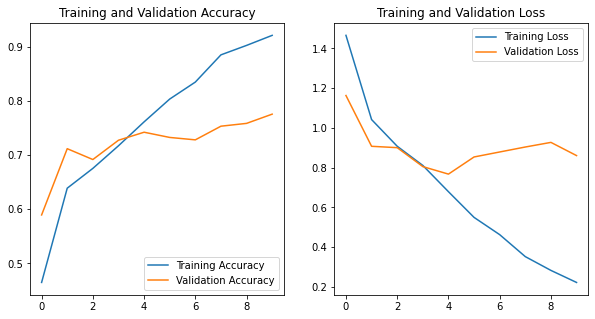

In [38]:
# 훈련 결과 시각화(드롭 아웃)
acc_drop      = history_drop.history['accuracy']
val_acc_drop  = history_drop.history['val_accuracy']
loss_drop     = history_drop.history['loss']
val_loss_drop = history_drop.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_drop, label='Training Accuracy')
plt.plot(epochs_range, val_acc_drop, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_drop, label='Training Loss')
plt.plot(epochs_range, val_loss_drop, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [39]:
# 예측값 확인
predictions_drop = model_drop.predict(x_test)
print(predictions_drop)

[[9.9943942e-01 2.1074013e-06 3.6658949e-07 ... 2.1849663e-05
  5.3614471e-04 7.8279818e-08]
 [1.5564752e-06 5.9698159e-01 7.6293957e-04 ... 1.9614149e-03
  1.3582883e-05 4.0675597e-03]
 [9.3837500e-08 1.3768401e-06 1.9105980e-06 ... 1.4324984e-06
  3.1091820e-04 3.8651262e-05]
 ...
 [1.6272068e-03 5.2811456e-01 7.4832543e-11 ... 3.2740348e-04
  7.0866831e-06 1.5556678e-04]
 [5.2883284e-09 9.9994898e-01 3.3315960e-06 ... 2.9331759e-09
  4.3992022e-05 1.7455297e-07]
 [3.7822688e-03 3.4686872e-03 2.9205224e-03 ... 6.7561990e-01
  1.5015441e-01 1.6225381e-01]]


In [40]:
# 8개의 레이블 중, 가장 큰 값을 최종 레이블로 저장
y_test_dummy_drop = []

for i in range(int(x_test.shape[0])):
    y_test_dummy_drop.append(np.argmax(predictions_drop[i]))

print(y_test_dummy_drop)

[0, 1, 3, 0, 1, 6, 3, 6, 0, 7, 7, 1, 2, 7, 2, 4, 7, 6, 1, 2, 6, 6, 0, 5, 1, 1, 4, 2, 3, 0, 2, 7, 3, 6, 6, 7, 1, 3, 0, 0, 2, 1, 0, 7, 5, 1, 4, 6, 2, 6, 4, 6, 3, 1, 6, 1, 2, 4, 6, 4, 1, 7, 1, 1, 4, 1, 3, 1, 2, 7, 6, 7, 7, 1, 0, 3, 3, 5, 2, 2, 7, 1, 3, 1, 7, 2, 0, 5, 7, 6, 5, 1, 1, 7, 6, 7, 4, 3, 3, 1, 0, 1, 0, 3, 6, 7, 6, 6, 3, 1, 2, 6, 6, 0, 0, 1, 6, 0, 6, 7, 6, 3, 2, 3, 6, 7, 6, 2, 5, 5, 1, 7, 1, 1, 3, 6, 6, 4, 1, 1, 2, 6, 3, 4, 0, 3, 3, 1, 2, 6, 3, 4, 7, 2, 3, 2, 7, 7, 3, 1, 6, 7, 5, 1, 6, 2, 5, 3, 6, 7, 6, 0, 0, 6, 7, 6, 0, 0, 7, 3, 5, 4, 0, 0, 0, 0, 5, 6, 2, 0, 1, 1, 6, 7, 0, 5, 0, 5, 4, 2, 5, 7, 3, 4, 6, 1, 4, 1, 2, 1, 0, 1, 4, 5, 7, 0, 6, 1, 4, 3, 7, 1, 0, 5, 7, 1, 7, 5, 4, 7, 4, 5, 1, 3, 3, 1, 5, 7, 6, 7, 7, 1, 3, 1, 5, 6, 5, 3, 5, 3, 1, 3, 7, 1, 6, 7, 4, 0, 6, 3, 0, 5, 0, 4, 6, 4, 7, 2, 6, 5, 6, 5, 1, 0, 5, 7, 1, 1, 7, 7, 1, 3, 0, 3, 4, 1, 4, 1, 6, 7, 6, 4, 7, 7, 1, 5, 1, 7, 1, 5, 3, 1, 7, 0, 1, 1, 3, 2, 6, 5, 7, 7, 7, 1, 0, 5, 3, 1, 6, 5, 7, 0, 3, 4, 1, 0, 2, 3, 3, 5, 2, 7, 6, 

In [41]:
cm_drop = confusion_matrix(y_test, y_test_dummy_drop) # 실제 레이블과 예측 레이블
print(cm_drop)

[[151   3   3   0   3  21   5  10]
 [  1 165  10   8   1   5  13   3]
 [  5  12  83   7   0   5   2   0]
 [  0  14   1 132   0   5   5   8]
 [  2  15   2   0 101   5   0   6]
 [ 10   9   7   3   1  81  11  16]
 [  6   3   2   1   0   7 204  13]
 [  6   9   1   3   2   8   5 129]]


In [42]:
def Accuracy(CM):
    CM_pd_drop = pd.DataFrame(cm_drop)
    CM_pd_drop[8] = CM_pd_drop.sum(axis = 1)
    
    for i in range(CM.shape[0]):

        TP = CM_pd_drop.loc[i,i]
        FP = CM_pd_drop.loc[i,8] - TP      
        FN = CM_pd_drop.loc[:,i].sum() - TP 

        # class num
        print("Class:", i)
        
        # Precision
        precision = round(TP / (TP + FP), 3)
        print("precision:", precision)

        # Recall
        recall = round(TP / (TP + FN), 3)
        print("recall   :", recall)
        
        print('-----------------')
    
Accuracy(cm_drop)

Class: 0
precision: 0.77
recall   : 0.834
-----------------
Class: 1
precision: 0.801
recall   : 0.717
-----------------
Class: 2
precision: 0.728
recall   : 0.761
-----------------
Class: 3
precision: 0.8
recall   : 0.857
-----------------
Class: 4
precision: 0.771
recall   : 0.935
-----------------
Class: 5
precision: 0.587
recall   : 0.591
-----------------
Class: 6
precision: 0.864
recall   : 0.833
-----------------
Class: 7
precision: 0.791
recall   : 0.697
-----------------


In [43]:
# 데이터 증강
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


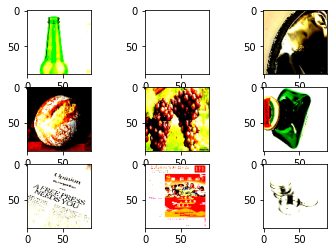

In [44]:
# 이미지 증강(반전)
# 참고 사이트: https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/
# 참고 사이트: https://www.novatec-gmbh.de/en/blog/keras-data-augmentation-for-cnn/

# 증강 기법 정의
datagen_bisic = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# 증강 적용
datagen_bisic.fit(x_train)

# 배치 크기 구성 및 이미지 확인
for X_batch, y_batch in datagen_bisic.flow(x_train, y_train, batch_size=9):
    # 3x3 이미지 확인
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

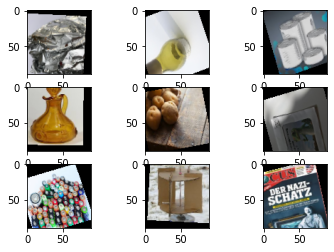

In [45]:
# 이미지 증강2 (반전 외)
# 참고 사이트: https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/
# 참고 사이트: https://www.novatec-gmbh.de/en/blog/keras-data-augmentation-for-cnn/

# 증강 기법 정의
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0)

# 증강 적용
datagen.fit(x_train)

# 적용된 이미지 출력
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # 3x3 이미지 확인
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [61]:
X_batch.shape

(9, 90, 90, 3)

In [46]:
# 드롭 아웃 + 이미지 증강
# 모델 컴파일
model_drop.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
       
# 모델 훈련
history_arg = model_drop.fit(x_train, y_train,
                             epochs=epochs,
                             verbose=1, 
                             validation_data=(x_test, y_test))

Epoch 1/10
169/169 [==============================] - 56s 331ms/step - loss: 0.1872 - accuracy: 0.9394 - val_loss: 1.0971 - val_accuracy: 0.7695
Epoch 2/10
169/169 [==============================] - 55s 323ms/step - loss: 0.1485 - accuracy: 0.9461 - val_loss: 1.1246 - val_accuracy: 0.7509
Epoch 3/10
169/169 [==============================] - 55s 324ms/step - loss: 0.1086 - accuracy: 0.9674 - val_loss: 1.2306 - val_accuracy: 0.7643
Epoch 4/10
169/169 [==============================] - 55s 327ms/step - loss: 0.1146 - accuracy: 0.9605 - val_loss: 1.2109 - val_accuracy: 0.7494
Epoch 5/10
169/169 [==============================] - 55s 325ms/step - loss: 0.1254 - accuracy: 0.9575 - val_loss: 1.3913 - val_accuracy: 0.7391
Epoch 6/10
169/169 [==============================] - 55s 325ms/step - loss: 0.0950 - accuracy: 0.9670 - val_loss: 1.2539 - val_accuracy: 0.7828
Epoch 7/10
169/169 [==============================] - 55s 323ms/step - loss: 0.0780 - accuracy: 0.9756 - val_loss: 1.2997 - val_ac

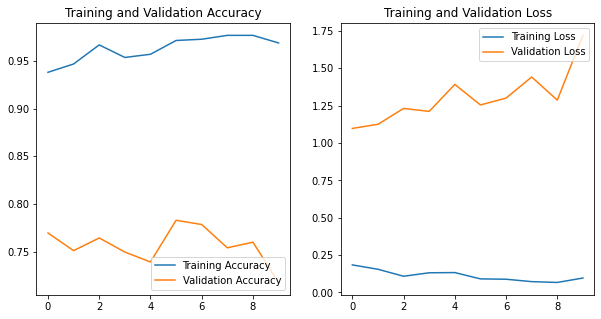

In [47]:
# 훈련 결과 시각화(이미지 증강)
acc_arg      = history_arg.history['accuracy']
val_acc_arg  = history_arg.history['val_accuracy']
loss_arg     = history_arg.history['loss']
val_loss_arg = history_arg.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_arg, label='Training Accuracy')
plt.plot(epochs_range, val_acc_arg, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_arg, label='Training Loss')
plt.plot(epochs_range, val_loss_arg, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [48]:
# 예측값 확인
predictions_arg = model_drop.predict(x_test)
print(predictions_arg)

[[1.00000000e+00 1.62472219e-14 4.35083132e-16 ... 1.27182802e-12
  3.27840222e-09 9.24234706e-17]
 [2.14640913e-05 9.31131482e-01 1.89785492e-02 ... 4.67011589e-04
  2.13464664e-05 5.25690521e-05]
 [2.78102561e-06 2.52909849e-05 2.87790986e-04 ... 2.00306681e-06
  3.46995108e-02 3.63684285e-06]
 ...
 [7.19401169e-06 1.64965320e-06 1.68827734e-12 ... 1.09420514e-10
  5.99022524e-12 2.23761343e-10]
 [4.38139247e-11 9.99997139e-01 1.55113003e-06 ... 4.31811772e-14
  1.32557693e-06 1.95371792e-11]
 [1.21521193e-03 3.31791257e-03 5.23655210e-03 ... 4.13448483e-01
  1.49167525e-02 5.61500132e-01]]


In [49]:
# 8개의 레이블 중, 가장 큰 값을 최종 레이블로 저장
y_test_dummy_arg = []

for i in range(int(x_test.shape[0])):
    y_test_dummy_arg.append(np.argmax(predictions_arg[i]))

print(y_test_dummy_arg)

[0, 1, 3, 0, 0, 6, 3, 6, 2, 1, 0, 1, 2, 7, 2, 4, 7, 6, 2, 2, 6, 6, 0, 2, 1, 2, 4, 2, 3, 0, 2, 5, 3, 6, 6, 7, 1, 2, 0, 0, 2, 1, 0, 7, 5, 1, 4, 6, 2, 6, 4, 6, 6, 1, 6, 1, 0, 4, 6, 4, 1, 3, 1, 2, 4, 2, 3, 1, 2, 7, 1, 7, 7, 2, 0, 2, 3, 0, 2, 2, 7, 1, 2, 1, 7, 2, 0, 5, 7, 6, 6, 1, 1, 7, 6, 7, 4, 3, 3, 4, 0, 4, 0, 0, 6, 7, 6, 6, 3, 2, 2, 6, 6, 0, 0, 2, 1, 0, 6, 7, 6, 3, 2, 2, 6, 7, 6, 0, 2, 2, 1, 7, 2, 4, 3, 6, 7, 4, 1, 1, 2, 6, 1, 4, 0, 2, 3, 1, 2, 6, 3, 4, 7, 2, 2, 2, 2, 7, 3, 1, 6, 7, 5, 1, 6, 2, 5, 3, 6, 7, 6, 0, 0, 6, 7, 6, 0, 0, 7, 2, 5, 4, 0, 0, 0, 0, 7, 6, 0, 0, 1, 1, 1, 4, 0, 6, 2, 5, 4, 2, 0, 7, 6, 4, 0, 2, 4, 1, 2, 1, 0, 1, 4, 5, 7, 0, 6, 1, 4, 2, 7, 1, 0, 5, 7, 1, 7, 0, 4, 7, 4, 1, 1, 2, 3, 4, 0, 7, 6, 7, 7, 1, 2, 1, 5, 6, 0, 3, 2, 3, 1, 3, 7, 1, 6, 7, 4, 0, 6, 3, 0, 5, 0, 4, 6, 4, 7, 2, 6, 6, 6, 5, 1, 0, 5, 0, 1, 1, 7, 7, 7, 3, 0, 1, 4, 2, 4, 4, 6, 7, 7, 4, 7, 7, 1, 6, 1, 7, 1, 5, 3, 1, 0, 4, 2, 4, 6, 2, 6, 6, 6, 7, 7, 2, 0, 5, 3, 1, 6, 6, 7, 0, 1, 4, 1, 0, 2, 3, 3, 6, 2, 5, 6, 

In [50]:
cm_arg = confusion_matrix(y_test, y_test_dummy_arg) # 실제 레이블과 예측 레이블
print(cm_arg)

[[159   2   5   0   3   9   5  13]
 [  3 151  30   1  10   1   9   1]
 [  6   8  92   1   1   3   1   2]
 [  4  16  24  95   0   4  12  10]
 [  2   4   3   0 118   3   0   1]
 [ 23   9  19   1   3  50  21  12]
 [ 10  14   5   2   0   2 197   6]
 [ 14  11   3   5   4   6  14 106]]


In [51]:
def Accuracy(CM):
    CM_pd_arg = pd.DataFrame(cm_arg)
    CM_pd_arg[8] = CM_pd_arg.sum(axis = 1)
    
    for i in range(CM.shape[0]):

        TP = CM_pd_arg.loc[i,i]
        FP = CM_pd_arg.loc[i,8] - TP      
        FN = CM_pd_arg.loc[:,i].sum() - TP 

        # class num
        print("Class:", i)
        
        # Precision
        precision = round(TP / (TP + FP), 3)
        print("precision:", precision)

        # Recall
        recall = round(TP / (TP + FN), 3)
        print("recall   :", recall)
        
        print('-----------------')
    
Accuracy(cm_arg)

Class: 0
precision: 0.811
recall   : 0.719
-----------------
Class: 1
precision: 0.733
recall   : 0.702
-----------------
Class: 2
precision: 0.807
recall   : 0.508
-----------------
Class: 3
precision: 0.576
recall   : 0.905
-----------------
Class: 4
precision: 0.901
recall   : 0.849
-----------------
Class: 5
precision: 0.362
recall   : 0.641
-----------------
Class: 6
precision: 0.835
recall   : 0.761
-----------------
Class: 7
precision: 0.65
recall   : 0.702
-----------------
